# Feature Correlation Dangers:

## OLS perspective:
### When the features are highly correlated in a linear regression model, it can lead to several issues, including:
1. Multicollinearity: Multicollinearity occurs when two or more predictors in a regression model are highly correlated with each other. This can lead to unstable and unreliable estimates of the regression coefficients, making it difficult to interpret the effect of each predictor on the outcome variable.
2. Overfitting: When there are too many predictors in a model, including those that are highly correlated, it can lead to overfitting. This means that the model is too complex and fits the training data too closely, leading to poor generalization performance on new data.
3. Increased standard errors: When the features are highly correlated, it can increase the standard errors of the regression coefficients, which reduces the power to detect significant effects.

## Lasso perspective:
### When features are highly correlated, the Lasso algorithm can exhibit the following behaviors. Also, to mitigate these issues, various modifications to the Lasso algorithm have been proposed, such as the Elastic Net, which combines the L1 and L2 penalties, and the Group Lasso, which promotes sparsity at the group level.
1. It becomes difficult for the Lasso to identify the most important features, as the penalty term can have similar effects on correlated features. The Lasso may select one feature from a set of highly correlated features while completely ignoring the rest of the features in the set.
2. The selected feature may change erratically due to small changes in the data or the algorithm's parameters. The estimated coefficients can have high variance, which can result in poor predictive performance and unreliable variable selection.
3. The Lasso can become unstable and lead to overfitting or underfitting of the model.

## kNN perspective:
### When features are highly correlated, the performance of k-Nearest Neighbor (k-NN) algorithm can be negatively impacted in several ways:
1. Redundant Information: When features are highly correlated, they provide redundant information to the algorithm, which can lead to a bias in the prediction. This can result in the k-NN algorithm assigning more weight to a particular feature, leading to the algorithm being skewed towards that feature. 
2. Overfitting: When features are highly correlated, the k-NN algorithm can overfit the training data, leading to poor performance on new data. Overfitting occurs when the algorithm is too complex and captures noise or idiosyncrasies of the training data, rather than generalizing to new data.
3. Curse of Dimensionality: When features are highly correlated, the dimensionality of the data increases. As the number of dimensions increases, the distance metric between the points becomes less meaningful, leading to poor performance of the k-NN algorithm.

## Random Forest perspective:
### When the features in a Random Forest model are highly correlated, the performance of the model may be negatively affected in several ways:
1. Variable Importance: The variable importance measures may be biased towards the most correlated variables, leading to the model overemphasizing their importance and potentially missing other important features.
2. Overfitting: When features are highly correlated, the model may overfit to the training data, resulting in poor generalization performance on new data.
3. Increased computation time: The Random Forest algorithm may require more computation time when dealing with highly correlated features, which may impact the model's scalability.

## Gradient Boosted Tree perspective:
### When features are highly correlated in an XGBoost model, it can lead to several issues, including:
1. Reduced model performance: Correlated features can confuse the model and lead to overfitting. This can cause a reduction in model performance, especially on new, unseen data.
2. Unnecessary complexity: When multiple features convey similar information, it can lead to an unnecessarily complex model. This can cause longer training times, higher memory usage, and slower inference times.
3. Unstable feature importance: Correlated features can make it difficult to determine the relative importance of each feature. The importance scores assigned by the model may vary greatly depending on which features are included in the analysis.

# Decorrelate Features in this NOTEBOOK
## cluster -> grouping -> PCA 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# set pandas to display all columns
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('new_222_data_train_imputed.csv')
df_test = pd.read_csv('new_222_data_test_imputed.csv')
# drop the county column and constant columns National_PI
df = df.drop(['county', 'National_PI'], axis=1)
df_test = df_test.drop(['county', 'National_PI'], axis=1)

# normalize the data except for the last column
df_norm = df.copy()
df_norm.iloc[:, :-1] = (df.iloc[:, :-1] - df.iloc[:, :-1].mean()) / df.iloc[:, :-1].std()
df_norm_test = df_test.copy()
df_norm_test.iloc[:, :-1] = (df_test.iloc[:, :-1] - df.iloc[:, :-1].mean()) / df.iloc[:, :-1].std()

In [3]:
df_norm.head(3)

,prev_year_access_to_exercise_opportunities,prev_year_adult_obesity,prev_year_adult_smoking,prev_year_air_pollution_particulate_matter,prev_year_alcohol_impaired_driving_deaths,prev_year_children_in_poverty,prev_year_children_in_single_parent_households,prev_year_dentists,prev_year_diabetes_monitoring,prev_year_drinking_water_violations,prev_year_driving_alone_to_work,prev_year_excessive_drinking,prev_year_flu_vaccinations,prev_year_food_environment_index,prev_year_high_school_completion,prev_year_income_inequality,prev_year_injury_deaths,prev_year_long_commute_driving_alone,prev_year_low_birthweight,prev_year_mammography_screening,prev_year_mental_health_providers,prev_year_physical_inactivity,prev_year_poor_mental_health_days,prev_year_poor_or_fair_health,prev_year_poor_physical_health_days,prev_year_premature_death,prev_year_preventable_hospital_stays,prev_year_primary_care_physicians,prev_year_severe_housing_problems,prev_year_sexually_transmitted_infections,prev_year_social_associations,prev_year_some_college,prev_year_teen_births,prev_year_unemployment,prev_year_uninsured,prev_year_violent_crime,prev_yr_rent_50_0,prev_yr_rent_50_1,prev_yr_rent_50_2,prev_yr_rent_50_3,prev_yr_rent_50_4,coastline_flag,Top_Marginal_Personal_Income_Tax_Rate,Top_Marginal_Corporate_Income_Tax_Rate,"Personal_Income_Tax_Progressivity_(change in tax liability per $1,000 of income)","Property_Tax_Burden_(per $1,000 of personal income)","Sales_Tax_Burden(per $1,000 of personal income)","Remaining_Tax_Burden(per $1,000 of personal income)",Estate_Inheritance_Tax_Levied_Flag,Recently_Legislated_Tax_Changes,Debt_Service_as_a_Share_of_Tax_Revenue,"Public_Employees_Per_10,000_of_Population_(full-time equivalent)","State_Liability_System_Survey_(tort litigation treatment, judicial impartiality, etc.)",State_Minimum_Wage_(federal floor is $7.25),Average Workers_Compensation_Costs_(per $100 of payroll),Right-to-Work_State_Flag_(option to join or support a union),Tax_Expenditure_Limits,deaths_number,death_pct_diff,GPT_Autoencoder_dim0,GPT_Autoencoder_dim1,GPT_Autoencoder_dim2,GPT_Autoencoder_dim3,GPT_Autoencoder_dim4,GPT_Autoencoder_dim5,GPT_Autoencoder_dim6,GPT_Autoencoder_dim7,GPT_Autoencoder_dim8,GPT_Autoencoder_dim9,GPT_PCA_dim0,GPT_PCA_dim1,GPT_PCA_dim2,GPT_PCA_dim3,GPT_PCA_dim4,GPT_PCA_dim5,GPT_PCA_dim6,GPT_PCA_dim7,GPT_PCA_dim8,GPT_PCA_dim9,GPT_OH_Connected_Economy,GPT_OH_Government_Support,GPT_OH_Large_Customer_Base,GPT_OH_Low_Cost_of_Living,GPT_OH_Natural_Resources,GPT_OH_Supportive_Community,GPT_OH_Limited_Financing,GPT_OH_Limited_Tech_n_Infra,GPT_OH_Low_Pop_Bad_Weather,GPT_OH_Tough_Labor_Market,GPT_OH_Unfavorable_Location,GPT_OH_Various_Downsides,pop_2010,pop_2015,pop_2020,pop_5yr_pct_chg,pop_10yr_pct_chg,PrevYr_RGDP,Prev_Yr_Agri_Pct_GDP,Prev_Yr_Mine_Pct_GDP,Prev_Yr_Retl_Pct_GDP,Prev_Yr_Manu_Pct_GDP,Prev_Yr_Info_Pct_GDP,Prev_Yr_FinS_Pct_GDP,Prev_Yr_EduS_Pct_GDP,Prev_Yr_EntS_Pct_GDP,Prev_Yr_Gvmt_Pct_GDP,Prev_Yr_GoMn_Pct_GDP,Prev_Yr_GoTr_Pct_GDP,Prev_Yr_GoMf_Pct_GDP,two_yrs_prior_pct_bb,two_yrs_prior_pct_college,two_yrs_prior_pct_foreign_born,two_yrs_prior_pct_it_workers,two_yrs_prior_median_hh_inc,microbusiness_density
0,-1.281500,0.252251,1.149881,0.638113,-0.435276,0.258017,0.279447,1.194684,0.035444,1.264778,0.029714,-0.619932,0.680623,0.018733,-0.177637,-0.659928,-1.161569,1.043264,-1.080636,-0.810606,0.024244,1.422684,0.640504,0.202726,0.151502,-0.622416,0.072810,0.672386,-0.354032,0.673211,0.533888,-0.974515,-0.434647,-0.122112,0.148439,-0.986811,-0.437495,-0.448667,-0.326502,-0.492796,-0.582103,-0.291167,-0.102667,-0.512837,-0.933054,-0.707998,0.150632,0.130549,-0.590063,-0.031700,0.337510,-0.717899,0.241598,-0.807349,-1.611448,0.657471,0.077657,-0.253352,0.415494,-1.702376,2.39980,-0.331169,0.321478,0.724097,2.288819,-0.384499,0.597944,-0.377432,-1.133578,0.586807,-0.538808,2.085159,-1.342685,0.683057,0.584154,2.116730,-0.969117,0.051444,1.094377,-0.523851,-1.531729,0.831479,0.219221,-0.449156,1.705847,0.674417,-0.889044,1.505880,-0.904973,

In [4]:
df_norm_test.head(3)

,prev_year_access_to_exercise_opportunities,prev_year_adult_obesity,prev_year_adult_smoking,prev_year_air_pollution_particulate_matter,prev_year_alcohol_impaired_driving_deaths,prev_year_children_in_poverty,prev_year_children_in_single_parent_households,prev_year_dentists,prev_year_diabetes_monitoring,prev_year_drinking_water_violations,prev_year_driving_alone_to_work,prev_year_excessive_drinking,prev_year_flu_vaccinations,prev_year_food_environment_index,prev_year_high_school_completion,prev_year_income_inequality,prev_year_injury_deaths,prev_year_long_commute_driving_alone,prev_year_low_birthweight,prev_year_mammography_screening,prev_year_mental_health_providers,prev_year_physical_inactivity,prev_year_poor_mental_health_days,prev_year_poor_or_fair_health,prev_year_poor_physical_health_days,prev_year_premature_death,prev_year_preventable_hospital_stays,prev_year_primary_care_physicians,prev_year_severe_housing_problems,prev_year_sexually_transmitted_infections,prev_year_social_associations,prev_year_some_college,prev_year_teen_births,prev_year_unemployment,prev_year_uninsured,prev_year_violent_crime,prev_yr_rent_50_0,prev_yr_rent_50_1,prev_yr_rent_50_2,prev_yr_rent_50_3,prev_yr_rent_50_4,coastline_flag,Top_Marginal_Personal_Income_Tax_Rate,Top_Marginal_Corporate_Income_Tax_Rate,"Personal_Income_Tax_Progressivity_(change in tax liability per $1,000 of income)","Property_Tax_Burden_(per $1,000 of personal income)","Sales_Tax_Burden(per $1,000 of personal income)","Remaining_Tax_Burden(per $1,000 of personal income)",Estate_Inheritance_Tax_Levied_Flag,Recently_Legislated_Tax_Changes,Debt_Service_as_a_Share_of_Tax_Revenue,"Public_Employees_Per_10,000_of_Population_(full-time equivalent)","State_Liability_System_Survey_(tort litigation treatment, judicial impartiality, etc.)",State_Minimum_Wage_(federal floor is $7.25),Average Workers_Compensation_Costs_(per $100 of payroll),Right-to-Work_State_Flag_(option to join or support a union),Tax_Expenditure_Limits,deaths_number,death_pct_diff,GPT_Autoencoder_dim0,GPT_Autoencoder_dim1,GPT_Autoencoder_dim2,GPT_Autoencoder_dim3,GPT_Autoencoder_dim4,GPT_Autoencoder_dim5,GPT_Autoencoder_dim6,GPT_Autoencoder_dim7,GPT_Autoencoder_dim8,GPT_Autoencoder_dim9,GPT_PCA_dim0,GPT_PCA_dim1,GPT_PCA_dim2,GPT_PCA_dim3,GPT_PCA_dim4,GPT_PCA_dim5,GPT_PCA_dim6,GPT_PCA_dim7,GPT_PCA_dim8,GPT_PCA_dim9,GPT_OH_Connected_Economy,GPT_OH_Government_Support,GPT_OH_Large_Customer_Base,GPT_OH_Low_Cost_of_Living,GPT_OH_Natural_Resources,GPT_OH_Supportive_Community,GPT_OH_Limited_Financing,GPT_OH_Limited_Tech_n_Infra,GPT_OH_Low_Pop_Bad_Weather,GPT_OH_Tough_Labor_Market,GPT_OH_Unfavorable_Location,GPT_OH_Various_Downsides,pop_2010,pop_2015,pop_2020,pop_5yr_pct_chg,pop_10yr_pct_chg,PrevYr_RGDP,Prev_Yr_Agri_Pct_GDP,Prev_Yr_Mine_Pct_GDP,Prev_Yr_Retl_Pct_GDP,Prev_Yr_Manu_Pct_GDP,Prev_Yr_Info_Pct_GDP,Prev_Yr_FinS_Pct_GDP,Prev_Yr_EduS_Pct_GDP,Prev_Yr_EntS_Pct_GDP,Prev_Yr_Gvmt_Pct_GDP,Prev_Yr_GoMn_Pct_GDP,Prev_Yr_GoTr_Pct_GDP,Prev_Yr_GoMf_Pct_GDP,two_yrs_prior_pct_bb,two_yrs_prior_pct_college,two_yrs_prior_pct_foreign_born,two_yrs_prior_pct_it_workers,two_yrs_prior_median_hh_inc,microbusiness_density
0,0.285337,0.940534,-0.321286,1.055050,-0.301439,-0.334206,0.381541,0.088976,-0.791305,-0.816345,0.723324,-0.331096,0.680623,0.743467,0.305200,0.954186,0.562613,0.482443,-0.078322,-0.281968,-0.369010,1.079124,0.340113,-0.193280,0.021881,0.670951,1.314880,0.004726,1.085796,0.111465,0.139096,-0.044432,-0.512654,0.602090,-0.877973,0.090873,1.357865,1.572649,1.540581,1.247697,1.161323,3.433091,1.952666,1.558362,1.771388,2.738136,-0.789759,-0.859763,1.694905,1.128334,-0.741886,0.062210,-0.748186,1.790302,3.191658,-1.521064,0.077657,-0.069096,-0.332877,-0.727257,0.174316,0.496045,0.745681,-0.041947,0.356595,0.313189,-0.755027,0.359190,0.180495,-1.489077,0.963184,0.077487,0.293155,-1.320844,-1.156394,0.713470,0.066467,1.510244,0.199935,-0.523851,0.652597,0.831479,0.219221,-0.449156,-0.585985,0.674417,-0.889044,1.505880,1.104564,-0.64453,-0.

In [5]:
# save the normalized data
df_norm.to_csv('new_222_data_train_norm.csv', index=False)
df_norm_test.to_csv('new_222_data_test_norm.csv', index=False)

# Operations on covariates to decorrelated them

In [6]:
covariates = df_norm.iloc[:, :-1]
target = df_norm.iloc[:, -1]

In [7]:
covariates_test = df_norm_test.iloc[:, :-1]
target_test = df_norm_test.iloc[:, -1]

# Visualize Feature Correlation
## Unorganized correlation map

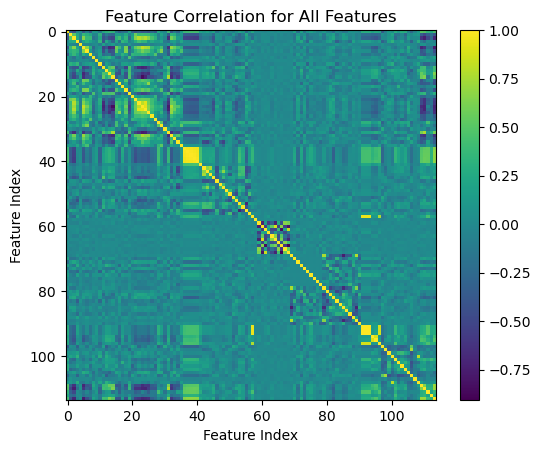

In [8]:
corr = covariates.corr()
corr_feat_mtx = corr.to_numpy()
plt.figure()
plt.imshow(corr_feat_mtx, interpolation='nearest')
plt.colorbar()
plt.xlabel('Feature Index')
plt.ylabel('Feature Index')
plt.title('Feature Correlation for All Features')
plt.show()

## Feature Clustering

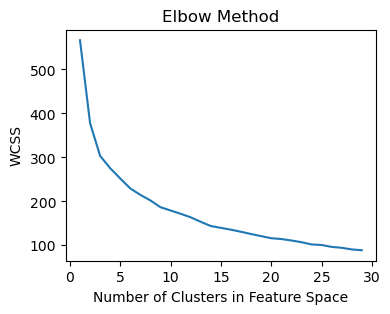

In [9]:
# Determine optimun number of clusters for kmeans
from sklearn.cluster import KMeans

wcss = []
max_num_clusters = 30
for i in range(1, max_num_clusters):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(corr_feat_mtx)
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize=(4,3))
plt.plot(range(1, max_num_clusters), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters in Feature Space')
plt.ylabel('WCSS')
plt.show()

In [10]:
# Seems like 15 clusters is a good number
n_clusters_kmeans = 10

kmeans = KMeans(n_clusters = n_clusters_kmeans, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 222)
corr_feat_labels = kmeans.fit_predict(corr_feat_mtx)

# Preparing a dataframe to collect some cluster stats
feat_names = covariates.columns
corr_feat_clust_df = pd.DataFrame(np.c_[feat_names, corr_feat_labels])
corr_feat_clust_df.columns = ["feature", "cluster"]
corr_feat_clust_df.sample(3)

,feature,cluster
104,Prev_Yr_EntS_Pct_GDP,2
13,prev_year_food_environment_index,0
60,GPT_Autoencoder_dim1,5


In [11]:
cluster_oriented_feature_list_grouped = []
cluster_oriented_feature_list = []
for i in range(n_clusters_kmeans):
    cluster_oriented_feature_list_grouped.append(corr_feat_clust_df[corr_feat_clust_df["cluster"]==i]["feature"].values.tolist())
    cluster_oriented_feature_list += corr_feat_clust_df[corr_feat_clust_df["cluster"]==i]["feature"].values.tolist()

## Organized clustered correlation map

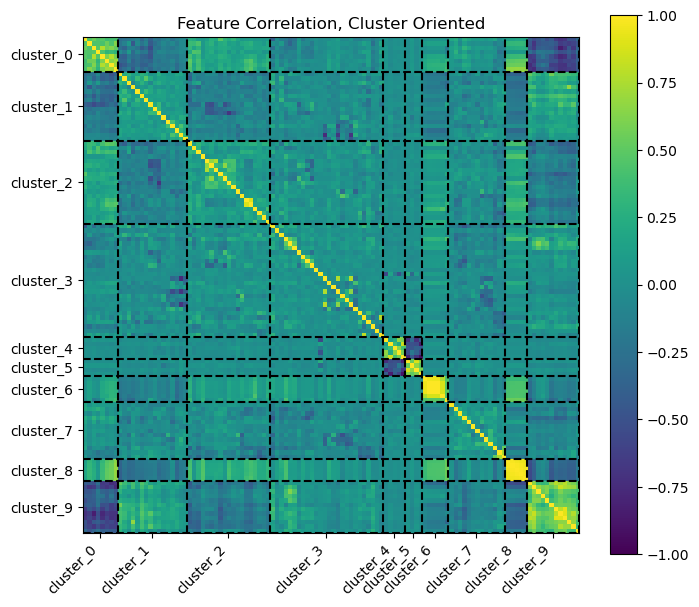

In [12]:
cluster_oriented_df = covariates[cluster_oriented_feature_list]
xticks_list = np.array([len(cluster_oriented_feature_list_grouped[i]) for i in range(n_clusters_kmeans)])
line_list = np.cumsum(xticks_list) - 0.5
xtick_list = line_list - xticks_list/2

corr = cluster_oriented_df.corr()
corr_feat_mtx = corr.to_numpy()
plt.figure(figsize=(8,7))
plt.imshow(corr_feat_mtx, interpolation='nearest', vmin=-1, vmax=1)
plt.xticks(xtick_list, [f'cluster_{i}' for i in range(n_clusters_kmeans)], rotation=45, ha='right')
plt.yticks(xtick_list, [f'cluster_{i}' for i in range(n_clusters_kmeans)])
for i in range(0, len(xtick_list)):
    plt.axvline(x=line_list[i], color='k', linestyle='--')
    plt.axhline(y=line_list[i], color='k', linestyle='--')
plt.colorbar()
plt.title('Feature Correlation, Cluster Oriented')
plt.show()

# Grouping the correlated features
###  based on ZZP's interpretation of +/- CORR

In [13]:
correlated_group_0_features_names = cluster_oriented_feature_list_grouped[2]

correlated_group_1_features_names = cluster_oriented_feature_list_grouped[0] + cluster_oriented_feature_list_grouped[9]

correlated_group_2_features_names = cluster_oriented_feature_list_grouped[6] + cluster_oriented_feature_list_grouped[8] 

correlated_group_3_features_names = cluster_oriented_feature_list_grouped[4] + cluster_oriented_feature_list_grouped[5]

correlated_groups_names = [correlated_group_0_features_names, correlated_group_1_features_names,
                            correlated_group_2_features_names, correlated_group_3_features_names]

# put the correlated features names inro a dataframe, fill the rest with NaN
longest_len = max(len(correlated_group_0_features_names), len(correlated_group_1_features_names),
                    len(correlated_group_2_features_names), len(correlated_group_3_features_names))
correlated_group_0_features_names_filled = np.concatenate((correlated_group_0_features_names, 
                                                                np.repeat(np.nan, longest_len - len(correlated_group_0_features_names))))
correlated_group_1_features_names_filled = np.concatenate((correlated_group_1_features_names,
                                                                np.repeat(np.nan, longest_len - len(correlated_group_1_features_names))))
correlated_group_2_features_names_filled = np.concatenate((correlated_group_2_features_names,
                                                                np.repeat(np.nan, longest_len - len(correlated_group_2_features_names))))
correlated_group_3_features_names_filled = np.concatenate((correlated_group_3_features_names,
                                                                np.repeat(np.nan, longest_len - len(correlated_group_3_features_names))))
corr_feat_clust_df = pd.DataFrame(np.c_[correlated_group_0_features_names_filled, correlated_group_1_features_names_filled,
                                        correlated_group_2_features_names_filled, correlated_group_3_features_names_filled])
corr_feat_clust_df.columns = ["correlated_group_0", "correlated_group_1", "correlated_group_2", "correlated_group_3"]
corr_feat_clust_df.head(10)

,correlated_group_0,correlated_group_1,correlated_group_2,correlated_group_3
0,prev_year_access_to_exercise_opportunities,prev_year_excessive_drinking,deaths_number,GPT_Autoencoder_dim0
1,prev_year_diabetes_monitoring,prev_year_food_environment_index,pop_2010,GPT_Autoencoder_dim2
2,prev_year_flu_vaccinations,prev_year_high_school_completion,pop_2015,GPT_Autoencoder_dim6
3,coastline_flag,prev_year_mammography_screening,pop_2020,GPT_Autoencoder_dim8
4,Top_Marginal_Personal_Income_Tax_Rate,prev_year_some_college,PrevYr_RGDP,GPT_Autoencoder_dim9
5,Top_Marginal_Corporate_Income_Tax_Rate,two_yrs_prior_pct_bb,two_yrs_prior_pct_foreign_born,GPT_Autoencoder_dim1
6,Personal_Income_Tax_Progressivity_(change in t...,two_yrs_prior_pct_college,prev_yr_rent_50_0,GPT_Autoencoder_dim4
7,"Property_Tax_Burden_(per $1,000 of personal in...",two_yrs_prior_median_hh_inc,prev_yr_rent_50_1,GPT_Autoencoder_dim5
8,Estate_Inheritance_Tax_Levied_Flag,prev_year_adult_smoking,prev_yr_rent_50_2,GPT_Autoencoder_dim7
9,State_Minimum_Wage_(federal floor is $7.25),prev_year_children_in_poverty,prev_yr_rent_50_3,nan


In [14]:
# rename columns to be more descriptive
corr_feat_clust_df.columns = ["Financial_Planning_Cluster", "Health_Social_Cluster", "Population_Cluster", "GPT_Description_Cluster"]
corr_feat_clust_df

,Financial_Planning_Cluster,Health_Social_Cluster,Population_Cluster,GPT_Description_Cluster
0,prev_year_access_to_exercise_opportunities,prev_year_excessive_drinking,deaths_number,GPT_Autoencoder_dim0
1,prev_year_diabetes_monitoring,prev_year_food_environment_index,pop_2010,GPT_Autoencoder_dim2
2,prev_year_flu_vaccinations,prev_year_high_school_completion,pop_2015,GPT_Autoencoder_dim6
3,coastline_flag,prev_year_mammography_screening,pop_2020,GPT_Autoencoder_dim8
4,Top_Marginal_Personal_Income_Tax_Rate,prev_year_some_college,PrevYr_RGDP,GPT_Autoencoder_dim9
5,Top_Marginal_Corporate_Income_Tax_Rate,two_yrs_prior_pct_bb,two_yrs_prior_pct_foreign_born,GPT_Autoencoder_dim1
6,Personal_Income_Tax_Progressivity_(change in t...,two_yrs_prior_pct_college,prev_yr_rent_50_0,GPT_Autoencoder_dim4
7,"Property_Tax_Burden_(per $1,000 of personal in...",two_yrs_prior_median_hh_inc,prev_yr_rent_50_1,GPT_Autoencoder_dim5
8,Estate_Inheritance_Tax_Levied_Flag,prev_year_adult_smoking,prev_yr_rent_50_2,GPT_Autoencoder_dim7
9,State_Minimum_Wage_(federal floor is $7.25),prev_year_children_in_poverty,prev_yr_rent_50_3,nan


## PCA or Subset on each group

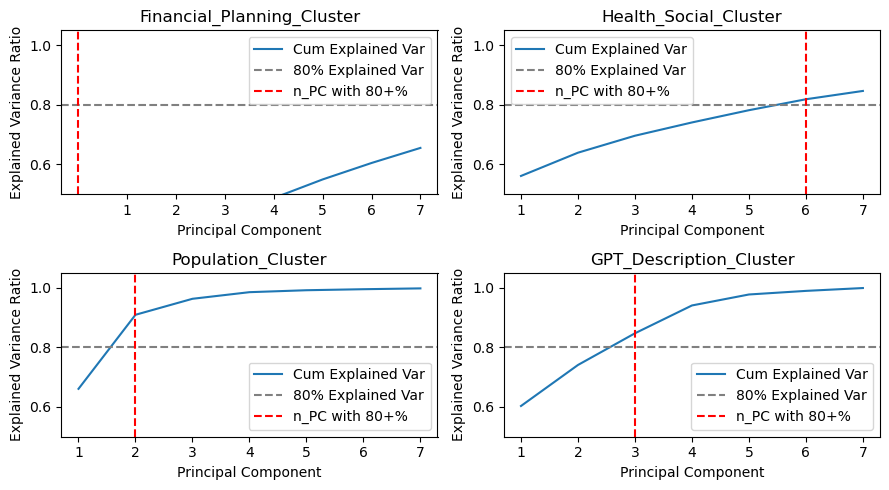

In [15]:
# PCA on correlated_group_0,1,2,3
from sklearn.decomposition import PCA

# 4 subplots for 4 clusters
fig, axs = plt.subplots(2, 2, figsize=(9, 5))
axs = axs.ravel()
for i in range(4):
    pca = PCA(n_components=7)
    covariate_name_list = correlated_groups_names[i]
    pca.fit(covariates[covariate_name_list])
    # plot cumulative explained variance ratio
    axs[i].plot(np.arange(7)+1, np.cumsum(pca.explained_variance_ratio_), 
                label='Cum Explained Var')
    # where the explained variance ratio is 0.8
    axs[i].axhline(y=0.8, color='gray', linestyle='--', label='80% Explained Var')
    # number of components where the explained variance ratio is 0.8
    exp_var_cumsum = np.cumsum(pca.explained_variance_ratio_)
    if np.any(exp_var_cumsum > 0.8):
        n_pc_80pct = np.where(exp_var_cumsum > 0.8)[0][0] + 1
    else:
        n_pc_80pct = 0
    axs[i].axvline(x=n_pc_80pct, color='r', linestyle='--', label='n_PC with 80+%')
    axs[i].legend()
    axs[i].set_title(corr_feat_clust_df.columns[i])
    axs[i].set_xlabel('Principal Component')
    axs[i].set_ylabel('Explained Variance Ratio')
    axs[i].set_ylim(0.5, 1.05)
    axs[i].set_xticks(np.arange(7)+1)
    axs[i].set_xticklabels(np.arange(7)+1)
plt.tight_layout()
plt.show()

It is generally recommended to perform **Principal Component Analysis (PCA) on normalized data** rather than unnormalized data. The reason for this is that PCA is a variance-based technique, meaning that it attempts to identify the directions in which the data varies the most. If the data is not normalized, then variables with large variances will dominate the analysis and obscure the contributions of variables with smaller variances.

Normalization involves scaling the variables so that they have similar variances and means. This ensures that each variable has an equal contribution to the PCA analysis. Additionally, normalization can also help to reduce the impact of outliers in the data, which can distort the PCA results.

Therefore, it is recommended to normalize the data before performing PCA to ensure that the analysis is not biased towards variables with large variances and to obtain more accurate results.

In [16]:
# copy the covariates dataframe 
covariates_decorr = covariates.copy()
covariates_test_decorr = covariates_test.copy()
# get rid of the correlated features from covariates_decorr
for i in [1,2,3]:
    covariates_decorr.drop(correlated_groups_names[i], axis=1, inplace=True)
    covariates_test_decorr.drop(correlated_groups_names[i], axis=1, inplace=True)

covariates_decorr.head(3)

,prev_year_access_to_exercise_opportunities,prev_year_adult_obesity,prev_year_air_pollution_particulate_matter,prev_year_alcohol_impaired_driving_deaths,prev_year_dentists,prev_year_diabetes_monitoring,prev_year_drinking_water_violations,prev_year_driving_alone_to_work,prev_year_flu_vaccinations,prev_year_injury_deaths,prev_year_long_commute_driving_alone,prev_year_mental_health_providers,prev_year_preventable_hospital_stays,prev_year_primary_care_physicians,prev_year_severe_housing_problems,prev_year_sexually_transmitted_infections,prev_year_social_associations,prev_year_uninsured,prev_year_violent_crime,coastline_flag,Top_Marginal_Personal_Income_Tax_Rate,Top_Marginal_Corporate_Income_Tax_Rate,"Personal_Income_Tax_Progressivity_(change in tax liability per $1,000 of income)","Property_Tax_Burden_(per $1,000 of personal income)","Sales_Tax_Burden(per $1,000 of personal income)","Remaining_Tax_Burden(per $1,000 of personal income)",Estate_Inheritance_Tax_Levied_Flag,Recently_Legislated_Tax_Changes,Debt_Service_as_a_Share_of_Tax_Revenue,"Public_Employees_Per_10,000_of_Population_(full-time equivalent)","State_Liability_System_Survey_(tort litigation treatment, judicial impartiality, etc.)",State_Minimum_Wage_(federal floor is $7.25),Average Workers_Compensation_Costs_(per $100 of payroll),Right-to-Work_State_Flag_(option to join or support a union),Tax_Expenditure_Limits,death_pct_diff,GPT_Autoencoder_dim3,GPT_PCA_dim0,GPT_PCA_dim1,GPT_PCA_dim2,GPT_PCA_dim3,GPT_PCA_dim4,GPT_PCA_dim5,GPT_PCA_dim6,GPT_PCA_dim7,GPT_PCA_dim8,GPT_PCA_dim9,GPT_OH_Connected_Economy,GPT_OH_Government_Support,GPT_OH_Large_Customer_Base,GPT_OH_Low_Cost_of_Living,GPT_OH_Natural_Resources,GPT_OH_Supportive_Community,GPT_OH_Limited_Financing,GPT_OH_Limited_Tech_n_Infra,GPT_OH_Low_Pop_Bad_Weather,GPT_OH_Tough_Labor_Market,GPT_OH_Unfavorable_Location,GPT_OH_Various_Downsides,pop_5yr_pct_chg,pop_10yr_pct_chg,Prev_Yr_Agri_Pct_GDP,Prev_Yr_Mine_Pct_GDP,Prev_Yr_Retl_Pct_GDP,Prev_Yr_Manu_Pct_GDP,Prev_Yr_Info_Pct_GDP,Prev_Yr_FinS_Pct_GDP,Prev_Yr_EduS_Pct_GDP,Prev_Yr_EntS_Pct_GDP,Prev_Yr_Gvmt_Pct_GDP,Prev_Yr_GoMn_Pct_GDP,Prev_Yr_GoTr_Pct_GDP,Prev_Yr_GoMf_Pct_GDP,two_yrs_prior_pct_it_workers
0,-1.281500,0.252251,0.638113,-0.435276,1.194684,0.035444,1.264778,0.029714,0.680623,-1.161569,1.043264,0.024244,0.072810,0.672386,-0.354032,0.673211,0.533888,0.148439,-0.986811,-0.291167,-0.102667,-0.512837,-0.933054,-0.707998,0.150632,0.130549,-0.590063,-0.031700,0.337510,-0.717899,0.241598,-0.807349,-1.611448,0.657471,0.077657,0.415494,0.321478,0.586807,-0.538808,2.085159,-1.342685,0.683057,0.584154,2.116730,-0.969117,0.051444,1.094377,-0.523851,-1.531729,0.831479,0.219221,-0.449156,1.705847,0.674417,-0.889044,1.505880,-0.904973,-0.64453,1.537582,-0.216963,-0.358240,0.238380,-0.315251,0.079336,0.455182,-0.658393,-0.196417,-0.775008,-0.221965,0.331634,-0.054242,-0.533948,-1.052742,-0.211705
1,0.981709,-0.436031,-1.744381,0.702335,-0.728287,-0.295256,1.264778,0.723324,0.276894,0.487648,-1.840961,-0.659269,-0.057193,-0.614297,-0.594003,0.399730,0.448064,0.353721,-0.293252,-0.291167,-1.570762,-1.992264,-1.011573,0.573032,0.086811,-0.875865,-0.590063,0.398511,-2.360979,4.936444,1.429338,-0.807349,0.227455,0.657471,-0.982727,-0.244048,0.563862,0.073391,-0.741716,-0.661917,-0.886786,1.774313,1.061814,-0.997218,0.275973,-0.586879,-1.514959,-0.523851,-1.531729,0.831479,0.219221,2.225510,-0.585985,0.674417,-0.889044,-0.663799,1.104564,-0.64453,1.537582,-0.418658,0.589649,-0.647079,-0.325416,0.219422,-0.493117,-0.267509,-0.288331,-1.357832,-0.952244,-0.595981,-0.650237,2.271985,-0.419784,0.391528
2,1.591035,-2.845020,-0.017073,-1.305214,-0.994880,-0.129906,-0.816345,-6.628939,-0.328701,-1.049122,1.684203,-0.715448,-0.904920,-0.919387,2.525623,2.613646,-0.513169,-1.288538,2.726396,3.433091,2.246285,0.670705,3.536958,-0.021777,-0.082512,0.178857,-0.590063,1.466358,0.337510,-0.755460,-2.218721,2.693833,2.203590,-1.521064,1.138042,-0.016137,1.882104,1.567343,0.747303,-0.661165,0.798766,-2.300

In [17]:
# PCA on 'finance_planning' with 4 PCs
# pca = PCA(n_components=4)
# covariate_name_list = correlated_groups_names[0]
# pca.fit(covariates[covariate_name_list])

# finance_planning_pca_covariates = pca.transform(covariates[covariate_name_list])
# finance_planning_pca_covariates_df = pd.DataFrame(finance_planning_pca_covariates)
# finance_planning_pca_covariates_df.columns = [f'finance_planning_pca_{i}' for i in range(4)]
# covariates_decorr = pd.concat([covariates_decorr, finance_planning_pca_covariates_df], axis=1)

# finance_planning_pca_covariates_test = pca.transform(covariates_test[covariate_name_list])
# finance_planning_pca_covariates_test_df = pd.DataFrame(finance_planning_pca_covariates_test)
# finance_planning_pca_covariates_test_df.columns = [f'finance_planning_pca_{i}' for i in range(4)]
# covariates_test_decorr = pd.concat([covariates_test_decorr, finance_planning_pca_covariates_test_df], axis=1)

# PCA on 'health_social' with 7 PCs
N_HS_PCs = 6
pca = PCA(n_components=N_HS_PCs)
covariate_name_list = correlated_groups_names[1]
pca.fit(covariates[covariate_name_list])

health_social_pca_covariates = pca.transform(covariates[covariate_name_list])
health_social_pca_covariates_df = pd.DataFrame(health_social_pca_covariates)
health_social_pca_covariates_df.columns = [f'health_social_pca_{i}' for i in range(N_HS_PCs)]
covariates_decorr = pd.concat([covariates_decorr, health_social_pca_covariates_df], axis=1)

health_social_pca_covariates_test = pca.transform(covariates_test[covariate_name_list])
health_social_pca_covariates_test_df = pd.DataFrame(health_social_pca_covariates_test)
health_social_pca_covariates_test_df.columns = [f'health_social_pca_{i}' for i in range(N_HS_PCs)]
covariates_test_decorr = pd.concat([covariates_test_decorr, health_social_pca_covariates_test_df], axis=1)

# add the population of 2020 and prev_rent to covariates_decorr, no PCA here
covariates_decorr['population_2020'] = covariates['pop_2020']
covariates_test_decorr['population_2020'] = covariates_test['pop_2020']
covariates_decorr['prev_yr_rent_50_2'] = covariates['prev_yr_rent_50_2']
covariates_test_decorr['prev_yr_rent_50_2'] = covariates_test['prev_yr_rent_50_2']

# PCA on GPT Encoded with 3 PCs
pca = PCA(n_components=3)
covariate_name_list = correlated_groups_names[3]
pca.fit(covariates[covariate_name_list])

gpt_description_pca_covariates = pca.transform(covariates[covariate_name_list])
gpt_description_pca_covariates_df = pd.DataFrame(gpt_description_pca_covariates)
gpt_description_pca_covariates_df.columns = [f'gpt_ae_pca_{i}' for i in range(3)]
covariates_decorr = pd.concat([covariates_decorr, gpt_description_pca_covariates_df], axis=1)

gpt_description_pca_covariates_test = pca.transform(covariates_test[covariate_name_list])
gpt_description_pca_covariates_test_df = pd.DataFrame(gpt_description_pca_covariates_test)
gpt_description_pca_covariates_test_df.columns = [f'gpt_ae_pca_{i}' for i in range(3)]
covariates_test_decorr = pd.concat([covariates_test_decorr, gpt_description_pca_covariates_test_df], axis=1)

## filter out terms that still have high corr

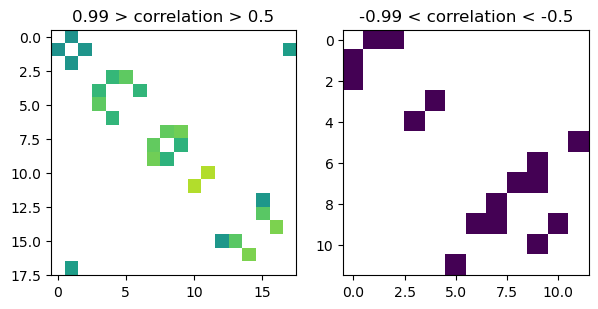

In [18]:
corr = covariates_decorr.corr()

# 0.99 > correlation > 0.5
corr_99_50 = corr[(corr > 0.5) & (corr < 0.99)]
corr_99_50 = corr_99_50.dropna(axis=0, how='all')
corr_99_50 = corr_99_50.dropna(axis=1, how='all')

# -0.99 < correlation < -0.5
corr_n99_n50 = corr[(corr < -0.5) & (corr > -0.99)]
corr_n99_n50 = corr_n99_n50.dropna(axis=0, how='all')
corr_n99_n50 = corr_n99_n50.dropna(axis=1, how='all')

# plot the correlation matrix
corr_99_50_mtx = corr_99_50.to_numpy()
corr_n99_n50_mtx = corr_n99_n50.to_numpy()
plt.figure(figsize=(6, 3))
# subplot 1
plt.subplot(1, 2, 1)
plt.imshow(corr_99_50_mtx, interpolation='nearest', vmin=0, vmax=1)
plt.title('0.99 > correlation > 0.5')
# subplot 2
plt.subplot(1, 2, 2)
plt.imshow(corr_n99_n50_mtx, interpolation='nearest', vmin=0, vmax=1)
plt.title('-0.99 < correlation < -0.5')
plt.tight_layout()
plt.show()

In [19]:
corr_99_50

,prev_year_severe_housing_problems,prev_year_sexually_transmitted_infections,prev_year_violent_crime,Top_Marginal_Personal_Income_Tax_Rate,Top_Marginal_Corporate_Income_Tax_Rate,"Personal_Income_Tax_Progressivity_(change in tax liability per $1,000 of income)",Estate_Inheritance_Tax_Levied_Flag,GPT_PCA_dim0,GPT_OH_Connected_Economy,GPT_OH_Unfavorable_Location,pop_5yr_pct_chg,pop_10yr_pct_chg,Prev_Yr_Agri_Pct_GDP,Prev_Yr_Mine_Pct_GDP,Prev_Yr_Manu_Pct_GDP,Prev_Yr_GoMn_Pct_GDP,Prev_Yr_GoMf_Pct_GDP,health_social_pca_1
prev_year_severe_housing_problems,NaN,0.510910,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
prev_year_sexually_transmitted_infections,0.51091,NaN,0.521633,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.557281
prev_year_violent_crime,NaN,0.521633,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Top_Marginal_Personal_Income_Tax_Rate,NaN,NaN,NaN,NaN,0.666918,0.7533,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Top_Marginal_Corporate_Income_Tax_Rate,NaN,NaN,NaN,0.666918,NaN,NaN,0.659467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Personal_Income_Tax_Progressivity_(change in tax liability per $1,000 of income)",NaN,NaN,NaN,0.753300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Estate_Inheritance_Tax_Levied_Flag,NaN,NaN,NaN,NaN,0.659467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GPT_PCA_dim0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.758928,0.781321,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GPT_OH_Connected_Economy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.758928,NaN,0.646576,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GPT_OH_Unfavorable_Location,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.781321,0.646576,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
corr_n99_n50

,prev_year_uninsured,Top_Marginal_Corporate_Income_Tax_Rate,Estate_Inheritance_Tax_Levied_Flag,State_Minimum_Wage_(federal floor is $7.25),Right-to-Work_State_Flag_(option to join or support a union),GPT_Autoencoder_dim3,GPT_PCA_dim0,GPT_OH_Connected_Economy,GPT_OH_Large_Customer_Base,GPT_OH_Limited_Financing,GPT_OH_Unfavorable_Location,gpt_ae_pca_1
prev_year_uninsured,NaN,-0.515782,-0.513737,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Top_Marginal_Corporate_Income_Tax_Rate,-0.515782,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Estate_Inheritance_Tax_Levied_Flag,-0.513737,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
State_Minimum_Wage_(federal floor is $7.25),NaN,NaN,NaN,NaN,-0.694936,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Right-to-Work_State_Flag_(option to join or support a union),NaN,NaN,NaN,-0.694936,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GPT_Autoencoder_dim3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.679957
GPT_PCA_dim0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.750641,NaN,NaN
GPT_OH_Connected_Economy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.527394,-0.676286,NaN,NaN
GPT_OH_Large_Customer_Base,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.527394,NaN,NaN,NaN,NaN
GPT_OH_Limited_Financing,NaN,NaN,NaN,NaN,NaN,NaN,-0.750641,-0.676286,NaN,NaN,-0.693068,NaN


In [21]:
pos_hi_corr_del = ['Personal_Income_Tax_Progressivity_(change in tax liability per $1,000 of income)', 
                    'Top_Marginal_Corporate_Income_Tax_Rate', 'prev_year_sexually_transmitted_infections',
                    'pop_5yr_pct_chg', 'Prev_Yr_GoMn_Pct_GDP', 'Prev_Yr_GoMf_Pct_GDP']
neg_hi_corr_del = ['Right-to-Work_State_Flag_(option to join or support a union)', 'GPT_Autoencoder_dim3', 
                   'GPT_OH_Connected_Economy']
other_del = ['death_pct_diff']

covariates_decorr = covariates_decorr.drop(pos_hi_corr_del, axis=1)
covariates_test_decorr = covariates_test_decorr.drop(pos_hi_corr_del, axis=1)

covariates_decorr = covariates_decorr.drop(neg_hi_corr_del, axis=1)
covariates_test_decorr = covariates_test_decorr.drop(neg_hi_corr_del, axis=1)

covariates_decorr = covariates_decorr.drop(other_del, axis=1)
covariates_test_decorr = covariates_test_decorr.drop(other_del, axis=1)

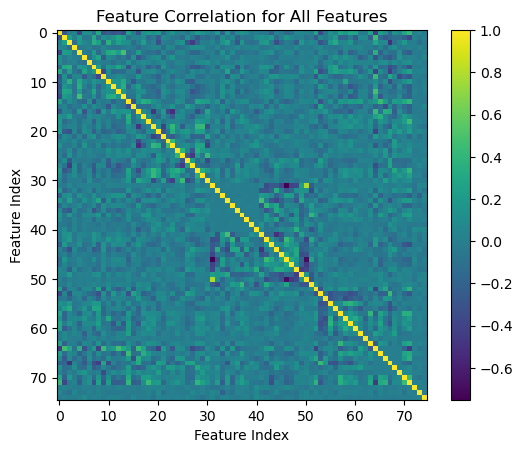

In [22]:
# show the correlation matrix of the covariates_decorr
corr = covariates_decorr.corr()
corr_feat_mtx = corr.to_numpy()
plt.figure()
plt.imshow(corr_feat_mtx, interpolation='nearest')
plt.colorbar()
plt.xlabel('Feature Index')
plt.ylabel('Feature Index')
plt.title('Feature Correlation for All Features')
plt.show()

In [23]:
# min correlation & max correlation thats not 1
corr.min().min() , corr[corr < 1].max().max()

(-0.7506408571199323, 0.781320504140744)

In [24]:
# concatenate the covariates_decorr with the target
df_decorr = pd.concat([covariates_decorr, target], axis=1)
df_decorr.to_csv('new_222_data_train_norm_decorr.csv', index=False)
df_decorr.sample(5)

,prev_year_access_to_exercise_opportunities,prev_year_adult_obesity,prev_year_air_pollution_particulate_matter,prev_year_alcohol_impaired_driving_deaths,prev_year_dentists,prev_year_diabetes_monitoring,prev_year_drinking_water_violations,prev_year_driving_alone_to_work,prev_year_flu_vaccinations,prev_year_injury_deaths,prev_year_long_commute_driving_alone,prev_year_mental_health_providers,prev_year_preventable_hospital_stays,prev_year_primary_care_physicians,prev_year_severe_housing_problems,prev_year_social_associations,prev_year_uninsured,prev_year_violent_crime,coastline_flag,Top_Marginal_Personal_Income_Tax_Rate,"Property_Tax_Burden_(per $1,000 of personal income)","Sales_Tax_Burden(per $1,000 of personal income)","Remaining_Tax_Burden(per $1,000 of personal income)",Estate_Inheritance_Tax_Levied_Flag,Recently_Legislated_Tax_Changes,Debt_Service_as_a_Share_of_Tax_Revenue,"Public_Employees_Per_10,000_of_Population_(full-time equivalent)","State_Liability_System_Survey_(tort litigation treatment, judicial impartiality, etc.)",State_Minimum_Wage_(federal floor is $7.25),Average Workers_Compensation_Costs_(per $100 of payroll),Tax_Expenditure_Limits,GPT_PCA_dim0,GPT_PCA_dim1,GPT_PCA_dim2,GPT_PCA_dim3,GPT_PCA_dim4,GPT_PCA_dim5,GPT_PCA_dim6,GPT_PCA_dim7,GPT_PCA_dim8,GPT_PCA_dim9,GPT_OH_Government_Support,GPT_OH_Large_Customer_Base,GPT_OH_Low_Cost_of_Living,GPT_OH_Natural_Resources,GPT_OH_Supportive_Community,GPT_OH_Limited_Financing,GPT_OH_Limited_Tech_n_Infra,GPT_OH_Low_Pop_Bad_Weather,GPT_OH_Tough_Labor_Market,GPT_OH_Unfavorable_Location,GPT_OH_Various_Downsides,pop_10yr_pct_chg,Prev_Yr_Agri_Pct_GDP,Prev_Yr_Mine_Pct_GDP,Prev_Yr_Retl_Pct_GDP,Prev_Yr_Manu_Pct_GDP,Prev_Yr_Info_Pct_GDP,Prev_Yr_FinS_Pct_GDP,Prev_Yr_EduS_Pct_GDP,Prev_Yr_EntS_Pct_GDP,Prev_Yr_Gvmt_Pct_GDP,Prev_Yr_GoTr_Pct_GDP,two_yrs_prior_pct_it_workers,health_social_pca_0,health_social_pca_1,health_social_pca_2,health_social_pca_3,health_social_pca_4,health_social_pca_5,population_2020,prev_yr_rent_50_2,gpt_ae_pca_0,gpt_ae_pca_1,gpt_ae_pca_2,microbusiness_density
1766,1.416942,-3.361232,-0.434009,-0.100684,-0.863769,0.366144,1.264778,-2.051115,1.185285,-0.861711,-0.158496,-0.701403,-1.158968,-0.830955,1.325767,-0.410179,-0.877973,-0.037169,-0.291167,-0.102667,0.151031,0.043829,-1.192551,-0.590063,0.129629,0.877208,0.138776,0.750629,1.591525,-0.294025,2.198426,1.659397,0.605209,-1.089668,0.713242,-1.581303,2.064196,-0.229153,0.766364,-1.579156,-1.324915,-1.531729,-1.202197,-4.559792,-0.449156,-0.585985,-1.482170,-0.889044,-0.663799,1.104564,-0.64453,-0.650113,0.972682,-0.652988,-0.311621,-0.675763,-0.008146,5.297619,-0.336477,0.140860,0.018215,-0.562498,-0.439191,2.603383,-6.751750,3.156250,1.390021,-0.103014,0.359285,0.519584,0.604869,3.287540,3.033275,0.004623,2.665826,18.696509
1934,0.764093,0.424322,0.102052,-0.167603,-0.203840,-0.625955,-0.816345,0.445880,0.781556,0.824988,1.123381,-0.551592,-0.143861,-0.141187,-0.114061,-0.890796,-1.288538,0.949819,3.433091,1.071809,-0.284745,-1.420160,1.552948,1.694905,0.075853,0.337510,-0.141485,0.467834,1.564419,-0.595934,-0.982727,1.533688,0.822671,-0.125278,0.852481,-0.356405,-0.723090,-0.164596,0.491058,0.442560,0.788307,0.652597,-1.202197,0.219221,-0.449156,-0.585985,-1.482170,-0.889044,-0.663799,1.104564,1.55090,-0.650113,0.103299,-0.514555,-0.325416,0.096419,0.494460,-0.260884,-0.457571,-0.029931,0.203219,0.538735,-0.533948,0.089911,-1.472064,0.052238,0.906759,-0.774788,-0.140539,-0.789481,-0.019472,1.540581,1.410257,-1.535807,-0.933095,3.960925
375,1.112279,-0.436031,-0.195760,0.501580,-0.688953,0.366144,-0.816345,-0.525174,0.075029,-0.524371,-1.119904,-0.649906,-0.251655,-0.773474,1.085796,0.362240,-1.083255,1.920801,-0.291167,0.484571,0.257470,-0.524053,-0.336427,-0.590063,0.075853,0.337510,-1.424330,0.213318,0.376276,-0.595934,1.138042,1.643141,1.116805,-0.297693,0.859914,0.090438,-0.111684,-0.648231,-0.541037,-0.349063,0.457216,0.652597,-1.202197,0.219221,-0.449156,-0.585985,-1.482170,-0.889044,-0.663799,1.104564,

In [25]:
df_decorr_test = pd.concat([covariates_test_decorr, target_test], axis=1)
df_decorr_test.to_csv('new_222_data_test_norm_decorr.csv', index=False)
df_decorr_test.sample(5)

,prev_year_access_to_exercise_opportunities,prev_year_adult_obesity,prev_year_air_pollution_particulate_matter,prev_year_alcohol_impaired_driving_deaths,prev_year_dentists,prev_year_diabetes_monitoring,prev_year_drinking_water_violations,prev_year_driving_alone_to_work,prev_year_flu_vaccinations,prev_year_injury_deaths,prev_year_long_commute_driving_alone,prev_year_mental_health_providers,prev_year_preventable_hospital_stays,prev_year_primary_care_physicians,prev_year_severe_housing_problems,prev_year_social_associations,prev_year_uninsured,prev_year_violent_crime,coastline_flag,Top_Marginal_Personal_Income_Tax_Rate,"Property_Tax_Burden_(per $1,000 of personal income)","Sales_Tax_Burden(per $1,000 of personal income)","Remaining_Tax_Burden(per $1,000 of personal income)",Estate_Inheritance_Tax_Levied_Flag,Recently_Legislated_Tax_Changes,Debt_Service_as_a_Share_of_Tax_Revenue,"Public_Employees_Per_10,000_of_Population_(full-time equivalent)","State_Liability_System_Survey_(tort litigation treatment, judicial impartiality, etc.)",State_Minimum_Wage_(federal floor is $7.25),Average Workers_Compensation_Costs_(per $100 of payroll),Tax_Expenditure_Limits,GPT_PCA_dim0,GPT_PCA_dim1,GPT_PCA_dim2,GPT_PCA_dim3,GPT_PCA_dim4,GPT_PCA_dim5,GPT_PCA_dim6,GPT_PCA_dim7,GPT_PCA_dim8,GPT_PCA_dim9,GPT_OH_Government_Support,GPT_OH_Large_Customer_Base,GPT_OH_Low_Cost_of_Living,GPT_OH_Natural_Resources,GPT_OH_Supportive_Community,GPT_OH_Limited_Financing,GPT_OH_Limited_Tech_n_Infra,GPT_OH_Low_Pop_Bad_Weather,GPT_OH_Tough_Labor_Market,GPT_OH_Unfavorable_Location,GPT_OH_Various_Downsides,pop_10yr_pct_chg,Prev_Yr_Agri_Pct_GDP,Prev_Yr_Mine_Pct_GDP,Prev_Yr_Retl_Pct_GDP,Prev_Yr_Manu_Pct_GDP,Prev_Yr_Info_Pct_GDP,Prev_Yr_FinS_Pct_GDP,Prev_Yr_EduS_Pct_GDP,Prev_Yr_EntS_Pct_GDP,Prev_Yr_Gvmt_Pct_GDP,Prev_Yr_GoTr_Pct_GDP,two_yrs_prior_pct_it_workers,health_social_pca_0,health_social_pca_1,health_social_pca_2,health_social_pca_3,health_social_pca_4,health_social_pca_5,population_2020,prev_yr_rent_50_2,gpt_ae_pca_0,gpt_ae_pca_1,gpt_ae_pca_2,microbusiness_density
49,0.154767,0.768463,-0.195760,-0.100684,-0.273766,0.366144,-0.816345,0.307158,1.084353,-0.486889,0.242091,-0.514140,0.832786,-0.256148,0.605853,-0.478839,-0.877973,1.061855,3.433091,0.778190,-1.413003,-3.108175,9.623051,-0.590063,0.075853,-0.741886,-0.179046,2.334282,0.660888,1.682110,0.077657,1.524423,0.244077,-0.914929,1.500756,-0.988265,0.860794,0.555487,0.829158,-1.928851,-0.171685,0.652597,-1.202197,0.219221,-0.449156,-0.585985,-1.482170,-0.889044,-0.663799,1.104564,1.55090,-0.650113,1.153486,-0.490921,-0.325416,-0.019750,-1.058249,-0.274134,0.527229,0.268953,0.034444,1.437826,-0.533948,-0.111166,-0.567395,0.304293,-0.498129,-1.369274,-0.424030,-0.028707,0.204379,0.761486,0.854035,1.712047,-1.140920,6.613671
73,-0.411035,0.424322,-0.195760,1.103845,-0.260655,1.027544,1.264778,0.029714,1.286217,-0.674300,-1.200022,0.866931,-0.500286,-0.583346,-0.833974,0.207756,-0.877973,-0.800083,-0.291167,0.484571,1.065158,-0.089024,-0.714839,1.694905,0.060488,-0.741886,1.820344,1.203101,-0.016760,0.227455,-0.982727,0.074432,-1.249975,-0.170047,-0.821835,-0.794497,-0.436268,0.071979,2.407586,1.039995,1.238562,0.652597,0.831479,0.219221,-0.449156,-0.585985,0.674417,-0.889044,1.505880,-0.904973,-0.64453,-0.650113,-0.390299,0.176761,-0.325416,-1.632449,-0.816164,-0.585517,-1.691853,-0.979957,-0.705572,1.089351,-0.533948,-1.317632,-3.096671,0.157759,-0.897876,1.043571,0.176056,0.018587,-0.288390,-0.601073,1.340349,0.159660,-0.420781,2.156898
256,1.416942,-0.952243,0.221177,0.300826,-0.627768,0.366144,-0.816345,0.029714,0.882488,-1.723802,0.883029,-0.593727,0.056560,-0.119079,0.845824,-0.753477,-0.262126,-0.442634,-0.291167,-0.102667,1.339396,-0.471954,0.908843,1.694905,0.075853,2.496302,-0.634109,-2.388398,1.338536,0.282348,-0.982727,1.582829,0.992845,-0.220769,1.250314,-0.826627,1.243326,1.187896,-0.862797,-0.430448,0.868486,0.652597,-1.202197,-4.559792,-0.449156,-0.585985,-1.482170,-0.889044,-0.663799,1.104564,1.55090,